<a href="https://colab.research.google.com/github/PurpleCoder-23/Twitter-Sentiment-Analysis/blob/main/Twittter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Import Dataset**

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment140


In [4]:
import os

# The path provided by kagglehub.dataset_download
data_directory = "/kaggle/input/sentiment140"

# List the contents of the directory
print("Files in the dataset directory:", os.listdir(data_directory))



Files in the dataset directory: ['training.1600000.processed.noemoticon.csv']


In [5]:
# The exact CSV filename you found
csv_file_name = "training.1600000.processed.noemoticon.csv"


In [6]:
# Construct the full path to the CSV file
csv_file_path = os.path.join(data_directory, csv_file_name)

In [7]:
# Define the column names as per the dataset's structure:
# sentiment: 0 = negative, 2 = neutral, 4 = positive
# id: The ID of the tweet
# date: The date of the tweet
# query: The query (e.g., 'fao_query')
# user: The user that tweeted
# text: The text of the tweet
column_names = ['sentiment', 'id', 'date', 'query', 'user', 'text']


In [8]:
import pandas as pd

df = pd.read_csv(csv_file_path, encoding='ISO-8859-1', names=column_names)


In [9]:
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.tail()

,sentiment,id,date,query,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


**Importing Dependencies**

In [70]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import matplotlib.pyplot as plt

from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer #Term frequence Inverse Document frequency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
#printing stopwords in english
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

**Data Processing**

In [15]:
twitter_data=df.copy()

In [16]:
twitter_data.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [17]:
twitter_data.shape

(1600000, 6)

In [18]:
twitter_data.columns

Index(['sentiment', 'id', 'date', 'query', 'user', 'text'], dtype='object')

In [19]:
twitter_data.dtypes

,0
sentiment,int64
id,int64
date,object
query,object
user,object
text,object


In [20]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [21]:
#Counting the number of missing values
twitter_data.isnull().sum()

,0
sentiment,0
id,0
date,0
query,0
user,0
text,0


In [22]:
#checking the distribution of sentiment column
twitter_data['sentiment'].value_counts()

,count
sentiment,
0,800000
4,800000


In [23]:
#convert the  sentiment 4(positive) to 1
twitter_data.loc[twitter_data['sentiment']==4,'sentiment']=1

In [24]:
twitter_data.tail()

,sentiment,id,date,query,user,text
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,1,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


**Stemming:**
Stemming is a heuristic process that reduces words to their base or root form (stem) by removing suffixes and prefixes, though the resulting stem may not always be a real word.



In [25]:
#port_stem=PorterStemmer()
lancaster_stemmer = LancasterStemmer()


In [26]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[lancaster_stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)

  return stemmed_content

In [27]:
#Prepare text for wordcloud
positive_sentiment=twitter_data[twitter_data['sentiment']==1]['text']

negative_sentiment=twitter_data[twitter_data['sentiment']==0]['text']

In [28]:
!pip install tqdm
from tqdm import tqdm
tqdm.pandas()

# Apply stemming to each entry in the Series with progress bar
preprocessed_positive_sentiment = positive_sentiment.astype(str).progress_apply(stemming)

# Combine all stemmed text into one string
combined_positive_sentiment = ' '.join(preprocessed_positive_sentiment.tolist())

# Print the first 100 characters
print(combined_positive_sentiment[:100])


100%|██████████| 800000/800000 [24:35<00:00, 542.10it/s]


lov heal uandpet u guy r best im meet on besty tonight cant wait girl talk darealsunisakim thank twi


In [30]:
tqdm.pandas(desc="\033[92mStemming...\033[95m")  # \033[92m = green, \033[0m = reset

preprocessed_negative_sentiment=negative_sentiment.astype(str).progress_apply(stemming)
combined_negative_sentiment=' '.join(preprocessed_negative_sentiment.tolist())
print(combined_negative_sentiment[:100])

Stemming...: 100%|██████████| 800000/800000 [21:36<00:00, 617.12it/s]

switchfoot http twitp com zl awww bum should got david car third day upset upd facebook text might c


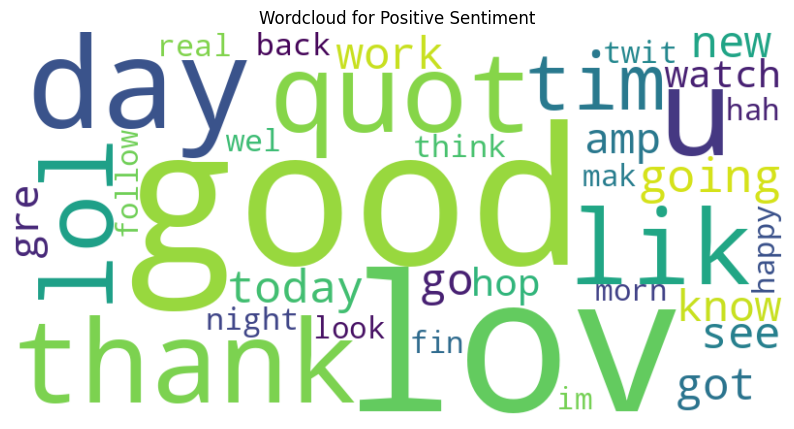

In [34]:
#Word cloud for positive sentiment
from wordcloud import WordCloud
wordcloud_positive=WordCloud(width=800,height=400,background_color='white',max_words=35,collocations=False).generate(combined_positive_sentiment)


plt.figure(figsize=(10,6))
plt.imshow(wordcloud_positive,interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud for Positive Sentiment",fontsize=12)
plt.show()

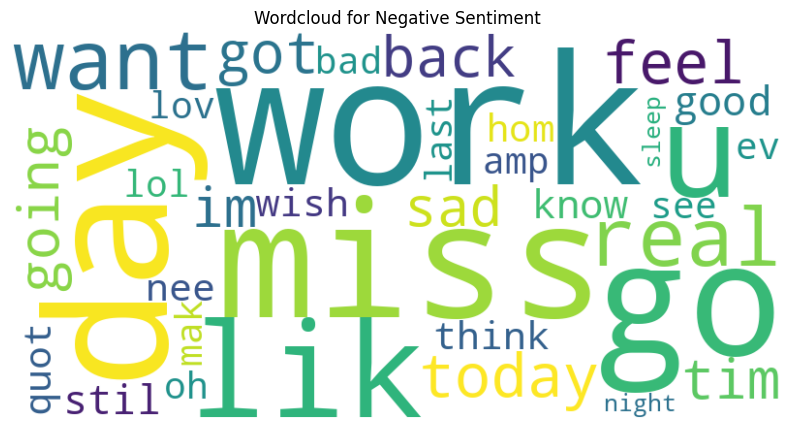

In [35]:
#Word cloud for negativee sentiment
from wordcloud import WordCloud
wordcloud_positive=WordCloud(width=800,height=400,background_color='white',max_words=35,collocations=False).generate(combined_negative_sentiment)


plt.figure(figsize=(10,6))
plt.imshow(wordcloud_positive,interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud for Negative Sentiment",fontsize=12)
plt.show()

In [36]:


# Register tqdm with pandas
tqdm.pandas(desc="\033[92mStemming...\033[95m")  # \033[92m = green, \033[0m = reset

# Now, use .progress_apply() instead of .apply()
twitter_data['stemmed_content'] = twitter_data['text'].progress_apply(stemming)
#twitter_data['stemmed_content']=twitter_data['text'].apply(stemming)

Stemming...: 100%|██████████| 1600000/1600000 [43:08<00:00, 618.17it/s]


In [37]:
twitter_data.head()

,sentiment,id,date,query,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitp com zl awww bum should g...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset upd facebook text might cry result schoo...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenich div many tim bal man sav rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whol body feel itchy lik fir
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [38]:
print(twitter_data['stemmed_content'])

0          switchfoot http twitp com zl awww bum should g...
1          upset upd facebook text might cry result schoo...
2              kenich div many tim bal man sav rest go bound
3                               whol body feel itchy lik fir
4                              nationwideclass behav mad see
                                 ...                        
1599995                              wok school best feel ev
1599996    thewdb com cool hear old walt interview http b...
1599997                         ready mojo makeov ask detail
1599998       happy th birthday boo all tim tupac amaru shak
1599999    happy charitytuesday thenspcc sparksch speakin...
Name: stemmed_content, Length: 1600000, dtype: object


In [39]:
print(twitter_data['sentiment'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: sentiment, Length: 1600000, dtype: int64


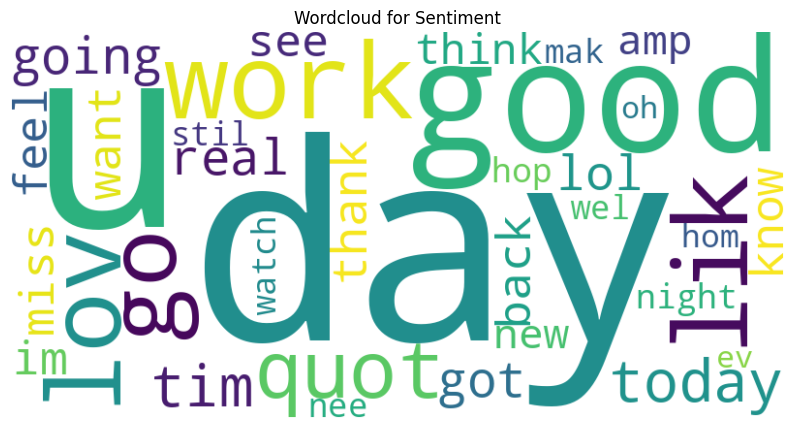

In [43]:
#Word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all stemmed text into one string for the wordcloud
combined_stemmed_content = ' '.join(twitter_data['stemmed_content'].tolist())

wordcloud_sentiment = WordCloud(width=800, height=400, background_color='white', max_words=35, collocations=False).generate(combined_stemmed_content)


plt.figure(figsize=(10,6))
plt.imshow(wordcloud_sentiment, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud for Sentiment", fontsize=12)
plt.show()

In [44]:

#separating the data and the label
X=twitter_data['stemmed_content'].values
y=twitter_data['sentiment'].values

In [45]:
print(X)

['switchfoot http twitp com zl awww bum should got david car third day'
 'upset upd facebook text might cry result school today also blah'
 'kenich div many tim bal man sav rest go bound' ...
 'ready mojo makeov ask detail'
 'happy th birthday boo all tim tupac amaru shak'
 'happy charitytuesday thenspcc sparksch speakinguph h']


In [46]:
print(y)

[0 0 0 ... 1 1 1]



split the data into test and train data

In [49]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [50]:
print(X.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


In [51]:

print(y.shape,y_train.shape,y_test.shape)

(1600000,) (1280000,) (320000,)


In [52]:
print(X_train)

['watch saw iv drink lil win' 'hatermagazin'
 'ev though favourit drink think vodk cok wip mind tim think im gonn find new drink'
 ... 'eag monday afternoon'
 'hop everyon moth gre day wait hear guy stor tomorrow'
 'lov wak folg bad voic deep']


In [53]:
print(X_test)

['mmang fin much tim chat twit hubby back sum amp tend domin fre tim'
 'ah may show w ruth kim amp geoffrey sanhuez'
 'ishatar mayb bay are thang dammit' ...
 'destin nevertheless hooray memb wond saf trip' 'feel wel'
 'supersandro thank']


In [54]:
#converting the textual data to numerical data

vectorizer=TfidfVectorizer()

X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [78]:
import pickle

# After fitting your vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [55]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9411305 stored elements and shape (1280000, 448173)>
  Coords	Values
  (0, 424412)	0.30221945300494174
  (0, 345265)	0.39790616381775973
  (0, 179404)	0.45474408902886737
  (0, 107455)	0.4159597877533756
  (0, 229040)	0.4634897687510778
  (0, 430243)	0.3945840718399217
  (1, 156019)	1.0
  (2, 107455)	0.46180785613844855
  (2, 121714)	0.17067188925986157
  (2, 396482)	0.1883727655697399
  (2, 126579)	0.2926656336638023
  (2, 395586)	0.3232153561285839
  (2, 421480)	0.3327219999519398
  (2, 77213)	0.3144879759465276
  (2, 430737)	0.33103265981490976
  (2, 260320)	0.24286731145600954
  (2, 398216)	0.15229500822726832
  (2, 172700)	0.16132721297809657
  (2, 146712)	0.18931848731924245
  (2, 129266)	0.2042368379770591
  (2, 281991)	0.1644712374271594
  (3, 395586)	0.2904385125882169
  (3, 154159)	0.44562376917191376
  (3, 147719)	0.27726654524065336
  (3, 56386)	0.5203558630936335
  :	:
  (1279996, 310469)	0.20398673580816423
  (

In [56]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2280203 stored elements and shape (320000, 448173)>
  Coords	Values
  (0, 16742)	0.1770135217597807
  (0, 32222)	0.16728551341732406
  (0, 67325)	0.2748000519501414
  (0, 104312)	0.36497416063077176
  (0, 129161)	0.18469080463117746
  (0, 134457)	0.24320508088308218
  (0, 166245)	0.2889171691236297
  (0, 264722)	0.46697439779594685
  (0, 272918)	0.18343564023615247
  (0, 377824)	0.22159402701890407
  (0, 388061)	0.3423080058519216
  (0, 398216)	0.3226709249544855
  (0, 409335)	0.18198652845857302
  (1, 8194)	0.29901965329897917
  (1, 16742)	0.21041662551846396
  (1, 141558)	0.5775531784983985
  (1, 212116)	0.40092390152400675
  (1, 250465)	0.28514059177458984
  (1, 338893)	0.4848434386226477
  (1, 356543)	0.23585191283207782
  (2, 24015)	0.35631831521079094
  (2, 35204)	0.3782607706414021
  (2, 88053)	0.3629027091591662
  (2, 177558)	0.5884764060179932
  (2, 250537)	0.2560662630324221
  :	:
  (319994, 431086)	0.2826127405031

**Training the Machine Learning Model**

Logistic Regression

In [57]:
model=LogisticRegression(max_iter=1000)


In [58]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

Accuracy score of Training data

In [59]:
X_train_prediction=model.predict(X_train)

training_data_accuracy=accuracy_score(y_train,X_train_prediction)

In [61]:
print(f"Accuracy score on the training data:{training_data_accuracy}")

Accuracy score on the training data:0.79751484375


Accuracy score on Test data

In [63]:
X_test_prediction=model.predict(X_test)

test_data_accuracy=accuracy_score(y_test,X_test_prediction)

In [64]:
print(f"Accuracy score on the training data:{test_data_accuracy}")

Accuracy score on the training data:0.774296875


Saving the Trained Model

In [65]:
import pickle

In [66]:
filename='LR_model.pkl'
pickle.dump(model,open(filename,'wb'))

Using the saved model in pkl file for future prediction

In [67]:
#loading the saved model

load_model=pickle.load(open('LR_model.pkl','rb'))

In [68]:
X_new=X_test[200]
print(y_test[200])


prediction=model.predict(X_new)
print(prediction)

1
[1]


In [69]:
if (prediction[0]==0):
  print('Negative Tweet')

else:
  print('Positive Tweet')

Positive Tweet


In [72]:

rf_model = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores



rf_model.fit(X_train, y_train)



KeyboardInterrupt: 

In [ ]:
X_train_prediction=rf_model.predict(X_train)

training_data_accuracy=accuracy_score(y_train,X_train_prediction)

In [ ]:
print(f"Accuracy score on the training data:{training_data_accuracy}")

In [ ]:
X_test_prediction=rf_model.predict(X_test_prediction)

test_data_accuracy=accuracy_score(y_test,X_test_prediction)

In [ ]:
print("Accuracy score on the training data:{test_data_accuracy}")

In [ ]:
# Classification Report (Precision, Recall, F1-score for each class)
print("\nClassification Report:")
print(classification_report(y_test, X_test_prediction, target_names=['Negative (0)', 'Positive (1)']))


In [ ]:
cm = confusion_matrix(y_test, X_test_prediction)
print("\nConfusion Matrix:")
print(cm)
print(f"True Negatives (TN): {cm[0, 0]}")
print(f"False Positives (FP): {cm[0, 1]}")
print(f"False Negatives (FN): {cm[1, 0]}")
print(f"True Positives (TP): {cm[1, 1]}")
print("-" * 30)

In [ ]:

cm_display=ConfusionMatrixDisplay(Confusion_matrix=cm,display_labels=rf_model.classes_)
cm_display.plot()
plt.show()

In [73]:
#streamlit app
!pip install streamlit

import streamlit as st
import pickle
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

nltk.download('punkt')

ps=Porterstemmer()

#load the model
with open("model_name","rb") as model_file:
  model=pickle.load(model_file)

#Preprocessing fuc
def stemming(content):
  stemmed_content=re.sub('[^a-zA-z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)

  return stemmed_content




#streamlit APP UI
st.title("Twitter Sentiment Analysis APP")
st.write("Enter a text to analye its sentiment and View the WordCloud")

user_input=st.text_area("Enter your text here",height=120)


#Button to trigger prediction

if st.button("Analyze Sentiment"):
  if user_input.strip()=="":
    st.warning("Please enter some text before analyzing")
    else:
      #Preprocess text
      preprocessed_text=stemming(user_input)

      #Vectorize text
      vectorized_text=vectorizer.transform([preprocessed_text])

      #Make prediction
      prediction=model.predict(vectorized_text)[0]
      confidence=model.predict_proba(vectorized_text).max()

      #Convert prediction to label
      sentiment_label="Positive" if prediction==1 else "Negative"

      st.subheader("Sentiment Prediction")
      st.write(f"Sentiment:{sentiment_label}")
      st.write(f"Confidence:{confidence:.2f}")

       #generate and show wordcloud
       st.subheader("Wordcloud")
       #Initialise the wordcloud object
       wc=WordCloud(background_color="white",width=500,height=400,max_words=30)

       #Generate and plot wordcloud
       plt.figure(figsize=(10,6))
       plt.imshow(wc.generate(stemmed_content))
       plt.axis("off")
      plt.show()



SyntaxError: invalid syntax (<ipython-input-73-0ae14850ab7c>, line 50)

In [77]:
# If running in local/Colab, you can install streamlit (not needed in actual app file)
!pip install streamlit

import streamlit as st
import pickle
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Initialize stemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Load the model and vectorizer
with open("LR_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

#with open("vectorizer.pkl", "rb") as vectorizer_file:
   # vectorizer = pickle.load(vectorizer_file)

# Preprocessing function
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if word not in stop_words]
    return ' '.join(stemmed_content)

# Streamlit App UI
st.title("Twitter Sentiment Analysis App")
st.write("Enter text to analyze sentiment and view the WordCloud")

user_input = st.text_area("Enter your text here", height=120)

# Button to trigger prediction
if st.button("Analyze Sentiment"):
    if user_input.strip() == "":
        st.warning("Please enter some text before analyzing.")
    else:
        # Preprocess text
        preprocessed_text = stemming(user_input)

        # Vectorize text
        vectorized_text = vectorizer.transform([preprocessed_text])

        # Make prediction
        prediction = model.predict(vectorized_text)[0]
        confidence = model.predict_proba(vectorized_text).max()

        # Convert prediction to label
        sentiment_label = "Positive" if prediction == 1 else "Negative"

        st.subheader("Sentiment Prediction")
        st.write(f"Sentiment: **{sentiment_label}**")
        st.write(f"Confidence: **{confidence:.2f}**")

        # Generate and show WordCloud
        st.subheader("WordCloud")
        wc = WordCloud(background_color="white", width=500, height=400, max_words=30)

        # Plot wordcloud
        plt.figure(figsize=(10, 6))
        plt.imshow(wc.generate(preprocessed_text), interpolation='bilinear')
        plt.axis("off")
        st.pyplot(plt)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2025-06-05 10:33:23.370 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 10:33:23.576 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-05 10:33:23.582 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 10:33:23.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 10:33:23.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 10:33:23.589 Thread 'MainThread': missing ScriptRunContext